In [1]:
import pandas as pd
import numpy as np
from numpy import load
from modules.mask import getComponents

# def getPhasesArray(int_mask, amount = 0):
#     return [1 for i in range(len(amount)) if (int(int_mask) & (1 << i)) > 0]

def parseArray(amounts_str):
    amounts = amounts_str.replace('[', '').replace(']', '')
    return np.array(amounts.split(','), dtype=np.float32)

all_phases = load('./DataSets/all_phases.npy')

df_origin = pd.read_csv('DataSets/parsedDataset.csv',delimiter = ';')
df = df_origin[df_origin['Error'].isna()].reset_index(drop=True)
df = df.drop(['Error'], axis =1)
df = df.rename(columns={"T": "Temp"})
df['amounts'] = df['amounts'].apply(parseArray)
df['GM'] = df['GM'].apply(parseArray)
df['Components'] = df['Components'].apply(getComponents)
amount_phases = len(df.loc[0, 'GM'])
# df['Components'] = df['Components'].apply(getComponents)
getPhasesArray = lambda x: [1 if (int(x) & (1 << i)) > 0 else 0 for i in range(amount_phases)]
df['phases'] = df['phases'].apply(getPhasesArray)
# df['possible_phases'] = df['possible_phases'].apply(getPhases)
print(df.dtypes)
# df

Unnamed: 0           int64
iter                 int64
Temp                 int64
amounts             object
Components          object
phases              object
ellapsed_time      float64
possible_phases     object
P                    int64
gm_time            float64
GM                  object
dtype: object


In [10]:
import sys

Y = pd.DataFrame(df['phases'].to_list(), columns=all_phases)
print(len(Y))
X = pd.DataFrame(df['GM'].to_list(), columns=all_phases)
X_max = X.replace([np.inf, -np.inf], np.nan).max().max()
# print(len(X[np.isneginf(X)].replace([np.inf, -np.inf], np.nan).min()))
X_min = X.replace([np.inf, -np.inf], np.nan).min().min()
# print(len(X[np.isneginf(X)] ))
# print(X[np.isneginf(X)])

# X[np.isneginf(X)] = X_min
# X[np.isinf(X)] = X_max
X = X.apply(lambda row: row.replace(np.inf, max(row)), axis=1)
X = X.apply(lambda row: row.replace(-np.inf, min(row)), axis=1)
X = X.apply(lambda row: row.fillna(row.max()), axis=1)
# X = X.fillna(X_max)
X = X.multiply(-1)

X_T = pd.DataFrame(df['Temp'].to_list(), columns=['Temp'])
X = pd.concat([X, X_T], axis=1)

X_A = pd.DataFrame(df['amounts'].to_list(), columns=df.loc[0, 'Components'])
X = pd.concat([X, X_A], axis=1)

# X.loc[0:, (X != 0).any(axis=0)]
X

1507


,A15_CR3PT,A2_BCC,AG2BA,AG2BA3,AG2CA,AG2CD3,AG2CE,AG2DY,AG2ER,AG2GA,...,ZRSI2,Temp,CO,CR,MO,NI,TA,V,W,ZR
0,9.661844e+03,9.661844e+03,9.661844e+03,9.661844e+03,9.661844e+03,9.661844e+03,9.661844e+03,9.661844e+03,9.661844e+03,9.661844e+03,...,9.661844e+03,1991,0.106400,0.070539,0.090987,0.083107,0.186603,0.185830,0.173657,0.102877
1,-6.590521e+04,-6.590521e+04,-6.590521e+04,-6.590521e+04,-6.590521e+04,-6.590521e+04,-6.590521e+04,-6.590521e+04,-6.590521e+04,-6.590521e+04,...,-6.590521e+04,1613,0.055819,0.064890,0.210491,0.105781,0.080682,0.130759,0.229928,0.121651
2,-1.387517e+05,-1.387517e+05,-1.387517e+05,-1.387517e+05,-1.387517e+05,-1.387517e+05,-1.387517e+05,-1.387517e+05,-1.387517e+05,-1.387517e+05,...,-1.387517e+05,1253,0.077059,0.054417,0.115156,0.176073,0.285718,0.120561,0.076375,0.094640
3,-2.811223e+05,-2.811223e+05,-2.811223e+05,-2.811223e+05,-2.811223e+05,-2.811223e+05,-2.811223e+05,-2.811223e+05,-2.811223e+05,-2.811223e+05,...,-2.811223e+05,429,0.149075,0.303064,0.285876,0.050672,0.058776,0.050181,0.051108,0.051249
4,-1.345640e+05,-1.345640e+05,-1.345640e+05,-1.345640e+05,-1.345640e+05,-1.345640e+05,-1.345640e+05,-1.345640e+05,-1.345640e+05,-1.345640e+05,...,-1.345640e+05,1324,0.295175,0.298476,0.062971,0.121728,0.055390,0.062540,0.051648,0.052072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,-2.127141e+05,-2.127141e+05,-2.127141e+05,-2.127141e+05,-2.127141e+05,-2.127141e+05,-2.127141e+05,-2.127141e+05,-2.127141e+05,-2.127141e+05,...,-2.127141e+05,900,0.315906,0.296999,0.121566,0.058745,0.052811,0.052180,0.051499,0.050294
1503,-3.497694e+06,-3.497694e+06,-3.497694e+06,-3.497694e+06,-3.497694e+06,-3.497694e+06,-3.497694e+06,-3.497694e+06,-3.497694e+06,-3.497694e+06,...,-3.497694e+06,925,0.120670,0.188050,0.093324,0.246129,0.068075,0.133552,0.097482,0.052719
1504,-2.174348e+05,-2.174348e+05,-2.174348e+05,-2.174348e+05,-2.174348e+05,-2.174348e+05,-2.174348e+05,-2.174348e+05,-2.174348e+05,-2.174348e+05,...,-2.174348e+05,920,0.315171,0.118400,0.230988,0.098976,0.051310,0.078566,0.055028,0.051562
1505,-1.174545e+05,-1.174545e+05,-1.174545e+05,-1.174545e+05,-1.174545e+05,-1.174545e+05,-1.174545e+05,-1.174545e+05,-1.174545e+05,-1.174545e+05,...,-1.174545e+05,1417,0.311876,0.264340,0.127697,0.070648,0.067072,0.054620,0.053035,0.050712


In [4]:
# !py -m pip install scikit-learn

In [11]:
from sklearn import preprocessing

def normDFColumn(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled=pd.DataFrame(min_max_scaler.fit_transform(df.T).T,columns=df.columns)
    # x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)
def normDFRow(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    # x_scaled=pd.DataFrame(min_max_scaler.fit_transform(df.T).T,columns=df.columns)
    x_scaled = min_max_scaler.fit_transform(df)
    return pd.DataFrame(x_scaled)
X[all_phases] = normDFColumn(X[all_phases])
X[['Temp']] = normDFRow(X[['Temp']])
X[df.loc[0, 'Components']] = normDFRow(X[df.loc[0, 'Components']])
X

,A15_CR3PT,A2_BCC,AG2BA,AG2BA3,AG2CA,AG2CD3,AG2CE,AG2DY,AG2ER,AG2GA,...,ZRSI2,Temp,CO,CR,MO,NI,TA,V,W,ZR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.626296,0.187664,0.067194,0.136683,0.110783,0.456813,0.513787,0.673980,0.240743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.486296,0.018873,0.048336,0.536111,0.186677,0.102594,0.305474,0.980682,0.326220
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.352963,0.089753,0.013380,0.217466,0.421950,0.788270,0.266902,0.143753,0.203245
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.047778,0.330068,0.843354,0.788075,0.002219,0.029335,0.000684,0.006039,0.005685
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.379259,0.817605,0.828038,0.043041,0.240054,0.018013,0.047433,0.008980,0.009433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.222222,0.886785,0.823108,0.238890,0.029241,0.009388,0.008247,0.008168,0.001338
1503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.231481,0.235282,0.459443,0.144492,0.656436,0.060433,0.316040,0.258795,0.012378
1504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.229630,0.884331,0.226951,0.604618,0.163898,0.004367,0.108052,0.027401,0.007113
1505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.413704,0.873337,0.714095,0.259382,0.069081,0.057079,0.017475,0.016538,0.003242


In [12]:
print(len(Y))
Y.loc[:, (Y != 0).any(axis=0)].columns

1507


Index(['ALTA_SIGMA', 'CHI_A12', 'CO2ZR', 'CO3MO', 'COTA2', 'COV3_A15', 'COZR',
       'GAS', 'LAVES_C14', 'LAVES_C15', 'LAVES_C36', 'LIQUID', 'MU_PHASE',
       'NI10ZR7', 'NI11ZR9', 'NI21ZR8', 'NI2V7', 'NI3ZR', 'NI7ZR2', 'NITA',
       'NITA2', 'NIW2', 'NIZR', 'NIZR2', 'PT2V', 'P_PHASE', 'SIGMA', 'W2ZR'],
      dtype='object')

In [13]:
X.isnull().sum().sum()

0

In [14]:
X = X.to_numpy()
Y = Y.to_numpy()
# Y = Y.astype(float)


In [15]:
print(f'Y_MAX = {np.max([iter.max() for iter in Y])}')
print(f'Y_MIN = {np.min([iter.min() for iter in Y])}')
print(f'Y_shape = {Y.shape}\n')

print(f'X_MAX = {np.max([iter.max() for iter in X])}')
print(f'X_MIN = {np.min([iter.min() for iter in X])}')
print(f'X_shape = {X.shape}')

Y_MAX = 1
Y_MIN = 0
Y_shape = (1507, 2023)

X_MAX = 1.0000001192092896
X_MIN = 0.0
X_shape = (1507, 2032)


In [16]:
shape = len(X[0])
print(shape)
out_shape = len(Y[0])
print(out_shape)
# shape = 2023

2032
2023


Main model

In [17]:
# !py -m pip install sklearn

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.optimizers import SGD
epoch = 20
model = Sequential()
# model.add(tf.keras.layers.BatchNormalization(synchronized=False))
model.add(Dense(2000, input_shape=(shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(out_shape, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.5)
# model.compile(optimizer='adam', loss="mse", metrics=["accuracy"])
model.compile(optimizer=opt, loss="kullback_leibler_divergence", metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=epoch)
predictions = model.predict(X[0:len(X)])

Epoch 1/20


c:\Users\Dmitry\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


38/38 [==============================] - 3s 63ms/step - loss: 9.8919 - accuracy: 0.4838 - val_loss: 6.7867 - val_accuracy: 0.5265
Epoch 2/20
38/38 [==============================] - 2s 61ms/step - loss: 6.5853 - accuracy: 0.4946 - val_loss: 6.3661 - val_accuracy: 0.5265
Epoch 3/20
38/38 [==============================] - 2s 63ms/step - loss: 6.1802 - accuracy: 0.4954 - val_loss: 6.3695 - val_accuracy: 0.4570
Epoch 4/20
38/38 [==============================] - 2s 63ms/step - loss: 6.0881 - accuracy: 0.5170 - val_loss: 6.2548 - val_accuracy: 0.5166
Epoch 5/20
38/38 [==============================] - 2s 64ms/step - loss: 6.0171 - accuracy: 0.5245 - val_loss: 6.0067 - val_accuracy: 0.5199
Epoch 6/20
38/38 [==============================] - 2s 61ms/step - loss: 6.1652 - accuracy: 0.5270 - val_loss: 5.9685 - val_accuracy: 0.5364
Epoch 7/20
38/38 [==============================] - 2s 60ms/step - loss: 5.8634 - accuracy: 0.5494 - val_loss: 5.8648 - val_accuracy: 0.5397
Epoch 8/20
38/38 [======

In [190]:

# H = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)
predictions = model.predict(X[0:len(X)])

48/48 [==============================] - 1s 15ms/step


Evaluate model

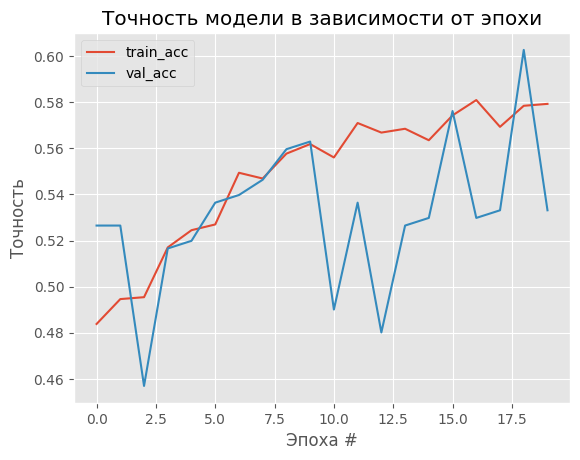

In [24]:
import matplotlib.pyplot as plt
def saveNNHist(H, name_diagram = 'Точность модели в зависимости от эпохи', epoch = epoch):
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, epoch), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, epoch), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epoch), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epoch), H.history["val_accuracy"], label="val_acc")
    plt.title(name_diagram)
    plt.xlabel("Эпоха #")
    plt.ylabel("Точность")
    plt.legend()
    # plt.savefig(f'./StatData/{name_diagram}.png')
saveNNHist(H,'Точность модели в зависимости от эпохи',20)

In [27]:
def parsePrediction(predictions, top = 8, tres = 0, phases = all_phases):
    if len(predictions) != len(all_phases):
        raise Exception('Wrong prediction dimensions!')
    top_ind = sorted(range(len(predictions)), key=lambda i: predictions[i])[-top:]
    predictions_ind = [(ind,predictions[ind]) for ind in top_ind if predictions[ind] > tres]
    predictions_out = {}
    for ind_prediction in predictions_ind:
        predictions_out[phases[ind_prediction[0]]] = ind_prediction[1]
    return predictions_out

def parseY(y_values, phases = all_phases):
    if len(y_values) != len(all_phases):
        raise Exception(f'Wrong y values dimensions! Should be {len(all_phases)}, but {len(y_values)}')
    return [phases[i] for i in range(len(y_values)) if y_values[i]> 0]

ind = 10
print(f'{parsePrediction(predictions[ind], 5)}\n')
parse_keys = list(parsePrediction(predictions[ind], 4).keys())
parse_keys.sort()
print(parse_keys)
print(parseY(Y[ind]))

{'NI7ZR2': 0.038210575, 'CO2ZR': 0.043749228, 'LAVES_C15': 0.06806577, 'LIQUID': 0.23923416, 'LAVES_C14': 0.42201635}

['CO2ZR', 'LAVES_C14', 'LAVES_C15', 'LIQUID']
['LAVES_C14', 'LAVES_C15', 'LIQUID', 'NI10ZR7']


In [28]:
def predictionsStat(predictions, Y, top = 8, tres = 0):
    full_correct = 0
    correct = 0
    incorrect = 0
    all_correct = 0
    not_incorrect = 0
    for i in range(len(predictions)):
        corr = 0
        incorr = 0
        pred_phases = parsePrediction(predictions[i], top, tres).keys()
        prev = parseY(Y[i])
        for pred_phase in pred_phases:
            if pred_phase in prev:
                corr += 1
            else:
                incorr += 1
        if corr == len(prev):
            all_correct += 1
        if incorr == 0:
            not_incorrect += 1
        if corr == len(prev) and incorr == 0:
            full_correct += 1
        correct += corr
        incorrect += incorr
    return len(Y), full_correct, all_correct, not_incorrect
def printPrediction(predictions, Y, top = 8, tres = 0):
    amount, full_correct, all_correct, not_incorrect = predictionsStat(predictions, Y, top, tres)
    print(f'All predictions = {amount}')
    print(f'All fully correct prediction = {full_correct}')
    print(f'All correct prediction = {all_correct}')
    print(f'Not error in prediction = {not_incorrect}')
    # print(f'Correct mean value = {correct/len(Y)}')
    # print(f'Incorrect mean value = {incorrect/len(Y)}')

printPrediction(predictions, Y, 8, 0.1)

All predictions = 1507
All fully correct prediction = 835
All correct prediction = 949
Not error in prediction = 1192


Dummy model

In [ ]:

inputs = tf.keras.layers.Input(shape=(shape,))
d = tf.keras.layers.Dense(shape, name='out')
output = d(inputs)
model = tf.keras.models.Model(
   inputs=inputs, outputs= output)
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["mae", "acc"])
model.fit(X,  Y, batch_size=64, epochs=5)
model.metrics_names

Epoch 1/5
8/8 [==============================] - 1s 90ms/step - loss: 0.0082 - mae: 0.0591 - acc: 0.0022
Epoch 2/5
8/8 [==============================] - 1s 90ms/step - loss: 0.0033 - mae: 0.0380 - acc: 0.3634
Epoch 3/5
8/8 [==============================] - 1s 94ms/step - loss: 0.0020 - mae: 0.0273 - acc: 0.2907
Epoch 4/5
8/8 [==============================] - 1s 91ms/step - loss: 0.0015 - mae: 0.0212 - acc: 0.2423
Epoch 5/5
8/8 [==============================] - 1s 97ms/step - loss: 0.0013 - mae: 0.0174 - acc: 0.2511


['loss', 'mae', 'acc']

KFold model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

# First define baseline model. Then use it in Keras Classifier for the training
def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(15, input_dim = shape, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(shape, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

estimator = KerasClassifier(build_fn = baseline_model, epochs = 10, batch_size = 10, verbose = 0)
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
# Try different values of splits e.g., 10

# Object to describe the result
results = cross_val_score(estimator, X, Y, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/tmp/ipykernel_18479/1024357918.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn = baseline_model, epochs = 10, batch_size = 10, verbose = 0)


Result: 32.58% (9.55%)
